In [1]:
#following example at https://analyticsindiamag.com/how-to-implement-convolutional-autoencoder-in-pytorch-with-cuda/

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn as nn
import torch.nn.functional as F

import os
import sys
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import torch_cae_multilevel_V4 as net

In [2]:
#loading data
data_path = '../data/npy/toy1.npy'
data = np.load(data_path)
print("data shape = ", data.shape)
data = torch.tensor(data).unsqueeze(1).float()
print("data shape = ", data.shape)

dataset = net.MultiScaleDynamicsDataSet(data_path, n_levels=3)
data,_,_ = dataset.obtain_data_at_current_level(level=0)

# Converting data to torch.FloatTensor
# transform = transforms.ToTensor()

# # Download the training and test datasets
# train_data = datasets.CIFAR10(root='data', train=True, download=True, transform=transform)

# test_data = datasets.CIFAR10(root='data', train=False, download=True, transform=transform)

# print("train_data shape = ", len(train_data))

data shape =  (500, 127, 127)
data shape =  torch.Size([500, 1, 127, 127])


C:\Users\16kat\anaconda3\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [3]:
# #Prepare data loaders
train_loader = torch.utils.data.DataLoader(data, batch_size=50, num_workers=0)
# print(len(train_loader))
# test_loader = torch.utils.data.DataLoader(test_data, batch_size=31, num_workers=0)

images shape =  (50, 1, 31, 31)


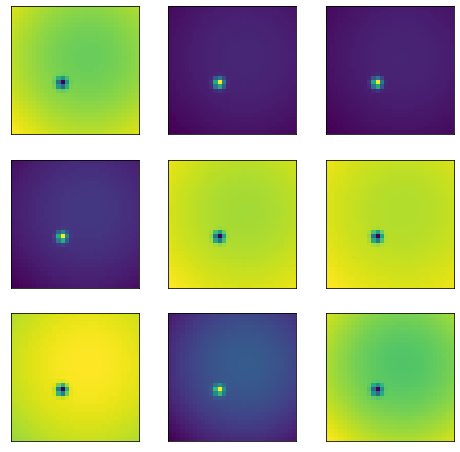

In [4]:
#Utility functions to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  
    plt.imshow(np.transpose(img, (1, 2, 0))) 

#Define the image classes
# classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#Obtain one batch of training images
dataiter = iter(train_loader)
images = dataiter.next()
images = images.numpy() # convert images to numpy for display

print("images shape = ", images.shape)
#Plot the images
fig = plt.figure(figsize=(8, 8))
# display 20 images
for idx in np.arange(9):
    ax = fig.add_subplot(3, 3, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
#     ax.set_title(classes[labels[idx]])

In [5]:
#Define the Convolutional Autoencoder
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
       
        #Encoder
        self.conv1 = nn.Conv2d(1, 1, 3, stride = 2, padding=1)  
#         self.conv2 = nn.Conv2d(1, 4, 3, padding=1)
#         self.pool = nn.MaxPool2d(2, 2)
       
        #Decoder
        self.t_conv1 = nn.ConvTranspose2d(1, 1, 3, stride=2, padding=1)


    def forward(self, x):
#         print("x start = ", x.shape)
        x = F.relu(self.conv1(x))
#         print("x 1 = ", x.shape)
#         x = self.pool(x)
#         print("x 2 = ", x.shape)
#         x = F.relu(self.conv2(x))
#         print("x 3 = ", x.shape)
#         x = self.pool(x)
#         print("x middle = ", x.shape)
#         x = F.relu(self.t_conv1(x))
#         print("x 4 = ", x.shape)
        x = F.sigmoid(self.t_conv1(x))
#         print("x end = ", x.shape)
#         hjj
        return x

    def encode(self, x):
        x = F.relu(self.conv1(x))
        return x
    
    def decode(self, x):
        x = F.sigmoid(self.t_conv1(x))
        return x

#Instantiate the model
model = ConvAutoencoder()
print(model)

ConvAutoencoder(
  (conv1): Conv2d(1, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (t_conv1): ConvTranspose2d(1, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
)


In [6]:
#Loss function
criterion = nn.BCELoss()

#Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def get_device():
    if torch.cuda.is_available():
        device = 'cuda:0'
    else:
        device = 'cpu'
    return device

device = get_device()
print(device)
model.to(device)

cpu


ConvAutoencoder(
  (conv1): Conv2d(1, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (t_conv1): ConvTranspose2d(1, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
)

In [7]:
#Epochs
n_epochs = 500

for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0

#     i = 0
    #Training
    for data in train_loader:
#         i += 1
#         if i % 100 == 0:
#             print('i: {} \tTraining Loss: {:.6f}'.format(i, train_loss/i))
#             break
        images = data
#         print(images.shape)
        images = images.to(device)
        optimizer.zero_grad()
        outputs = model(images)
#         print(outputs.shape)
#         fghj
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*images.size(0)
          
    train_loss = train_loss/len(train_loader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch, train_loss))

Epoch: 1 	Training Loss: 35.367245


C:\Users\16kat\anaconda3\lib\site-packages\torch\nn\functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 2 	Training Loss: 35.146872
Epoch: 3 	Training Loss: 34.919587
Epoch: 4 	Training Loss: 34.683036
Epoch: 5 	Training Loss: 34.438548
Epoch: 6 	Training Loss: 34.188864
Epoch: 7 	Training Loss: 33.932335
Epoch: 8 	Training Loss: 33.667452
Epoch: 9 	Training Loss: 33.394519
Epoch: 10 	Training Loss: 33.115266
Epoch: 11 	Training Loss: 32.830692
Epoch: 12 	Training Loss: 32.542245
Epoch: 13 	Training Loss: 32.251507
Epoch: 14 	Training Loss: 31.960168
Epoch: 15 	Training Loss: 31.669682
Epoch: 16 	Training Loss: 31.381473
Epoch: 17 	Training Loss: 31.096818
Epoch: 18 	Training Loss: 30.816635
Epoch: 19 	Training Loss: 30.541526
Epoch: 20 	Training Loss: 30.271818
Epoch: 21 	Training Loss: 30.007536
Epoch: 22 	Training Loss: 29.748517
Epoch: 23 	Training Loss: 29.494465
Epoch: 24 	Training Loss: 29.244927
Epoch: 25 	Training Loss: 28.999393
Epoch: 26 	Training Loss: 28.757393
Epoch: 27 	Training Loss: 28.518501
Epoch: 28 	Training Loss: 28.282601
Epoch: 29 	Training Loss: 28.049284


Epoch: 228 	Training Loss: -2.282953
Epoch: 229 	Training Loss: -2.397667
Epoch: 230 	Training Loss: -2.512186
Epoch: 231 	Training Loss: -2.626513
Epoch: 232 	Training Loss: -2.740651
Epoch: 233 	Training Loss: -2.854597
Epoch: 234 	Training Loss: -2.968361
Epoch: 235 	Training Loss: -3.081939
Epoch: 236 	Training Loss: -3.195331
Epoch: 237 	Training Loss: -3.308541
Epoch: 238 	Training Loss: -3.421573
Epoch: 239 	Training Loss: -3.534423
Epoch: 240 	Training Loss: -3.647096
Epoch: 241 	Training Loss: -3.759594
Epoch: 242 	Training Loss: -3.871917
Epoch: 243 	Training Loss: -3.984064
Epoch: 244 	Training Loss: -4.096039
Epoch: 245 	Training Loss: -4.207848
Epoch: 246 	Training Loss: -4.319491
Epoch: 247 	Training Loss: -4.430966
Epoch: 248 	Training Loss: -4.542274
Epoch: 249 	Training Loss: -4.653418
Epoch: 250 	Training Loss: -4.764400
Epoch: 251 	Training Loss: -4.875219
Epoch: 252 	Training Loss: -4.985880
Epoch: 253 	Training Loss: -5.096381
Epoch: 254 	Training Loss: -5.206727
E

Epoch: 446 	Training Loss: -24.591176
Epoch: 447 	Training Loss: -24.686361
Epoch: 448 	Training Loss: -24.781517
Epoch: 449 	Training Loss: -24.876638
Epoch: 450 	Training Loss: -24.971721
Epoch: 451 	Training Loss: -25.066756
Epoch: 452 	Training Loss: -25.161742
Epoch: 453 	Training Loss: -25.256692
Epoch: 454 	Training Loss: -25.351607
Epoch: 455 	Training Loss: -25.446494
Epoch: 456 	Training Loss: -25.541348
Epoch: 457 	Training Loss: -25.636177
Epoch: 458 	Training Loss: -25.730978
Epoch: 459 	Training Loss: -25.825753
Epoch: 460 	Training Loss: -25.920497
Epoch: 461 	Training Loss: -26.015218
Epoch: 462 	Training Loss: -26.109915
Epoch: 463 	Training Loss: -26.204586
Epoch: 464 	Training Loss: -26.299231
Epoch: 465 	Training Loss: -26.393852
Epoch: 466 	Training Loss: -26.488447
Epoch: 467 	Training Loss: -26.583013
Epoch: 468 	Training Loss: -26.677557
Epoch: 469 	Training Loss: -26.772072
Epoch: 470 	Training Loss: -26.866557
Epoch: 471 	Training Loss: -26.961018
Epoch: 472 	

(50, 1, 31, 31)
Original Images


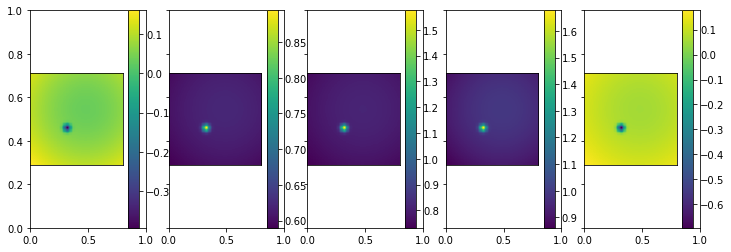

Reconstructed Images


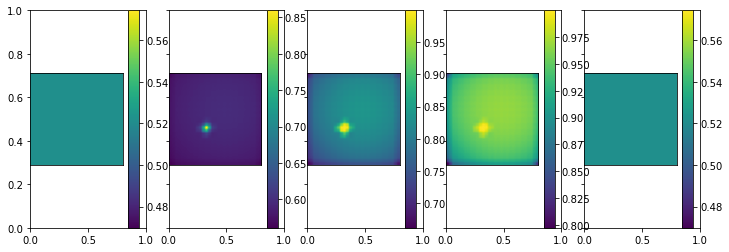

In [8]:
#Batch of test images
dataiter = iter(train_loader)
images = dataiter.next()

#Sample outputs
output = model(images)
images = images.numpy()

print(images.shape)
batch_size = 50
output = output.view(batch_size, 1, 31, 31)#127, 127)
output = output.detach().numpy()

#Original Images
print("Original Images")
fig, axes = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, figsize=(12,4))
for idx in np.arange(5):
    ax = fig.add_subplot(1, 5, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
#     ax.set_title(classes[labels[idx]])
    plt.colorbar()
plt.show()

#Reconstructed Images
print('Reconstructed Images')
fig, axes = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, figsize=(12,4))
for idx in np.arange(5):
    ax = fig.add_subplot(1, 5, idx+1, xticks=[], yticks=[])
    imshow(output[idx])
    plt.colorbar()
#     ax.set_title(classes[labels[idx]])
plt.show() 

torch.Size([10, 1, 31, 31])
(10, 1, 16, 16)


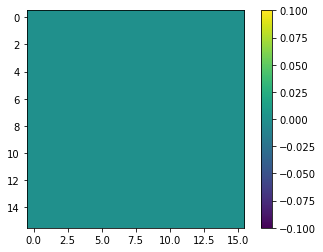

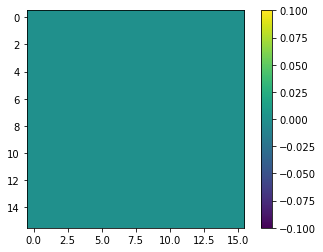

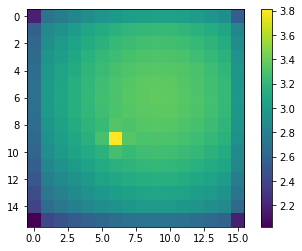

In [20]:
#Batch of test images
# dataiter = iter(train_loader)
# images = dataiter.next()
images = data[:10, :,:,:]
print(images.shape)
#encode and plot

encoded = model.encode(images).detach().numpy()
print(encoded.shape)

#encoded Images
plt.figure()
plt.imshow(encoded[0,0,:,:])
plt.colorbar()
plt.show()
plt.figure()
plt.imshow(encoded[1,0,:,:])
plt.colorbar()
plt.show()
plt.figure()
plt.imshow(encoded[2,0,:,:])
plt.colorbar()
plt.show()
# fig, axes = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, figsize=(12,4))
# for idx in np.arange(5):
#     ax = fig.add_subplot(1, 5, idx+1, xticks=[], yticks=[])
#     imshow(encoded[idx])
# #     ax.set_title(classes[labels[idx]])
#     plt.colorbar()
# plt.show()

data shape =  (500, 127, 127)
data shape =  torch.Size([500, 1, 127, 127])
torch.Size([500, 1, 127, 127])
torch.Size([10, 1, 31, 31])
...Done!


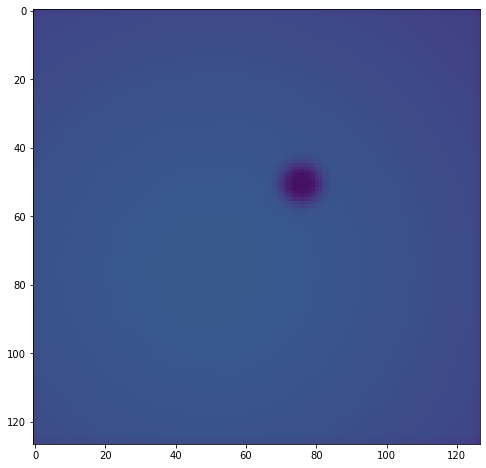

In [21]:
import matplotlib.animation as animation
data_path = '../data/npy/toy1.npy'
data = np.load(data_path)
print("data shape = ", data.shape)
data = torch.tensor(data).unsqueeze(1).float()
print("data shape = ", data.shape)
print(data.shape)
# ghj
output = model(data)#.numpy()

print(images.shape)
batch_size = 500
output = output.view(batch_size, 1, 127, 127)
output = output.detach().numpy()

fps = 30
nSeconds = 50/fps
# snapshots = [ np.random.rand(5,5) for _ in range( nSeconds * fps ) ]

# a=output
snapshots = output
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(8,8) )

a = snapshots[0,:,:,:][0].T
im = plt.imshow(a, interpolation='none', aspect='auto', vmin=0, vmax=1)

def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )

    im.set_array(snapshots[i,:,:,:,][0].T)
    return [im]

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = int(nSeconds * fps),
                               interval = 1000 / fps, # in ms
                               )
writergif = animation.PillowWriter(fps=30)
anim.save('Toy_1_Phi_simple_reconstruct.gif', writer=writergif)#, fps=30)


print('Done!')

# plt.show()  # Not required, it seems!